# RGB Colorspace

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

%matplotlib inline

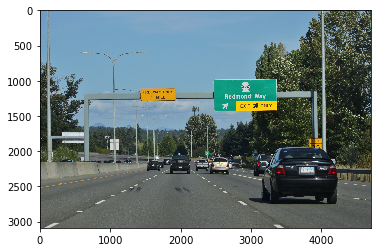

In [5]:
# Read in image

image = cv2.imread('images/wa_state_highway.jpg')

# BGR to RGB

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)

Isolate the three channels

Text(0.5, 1.0, 'Blue Channel')

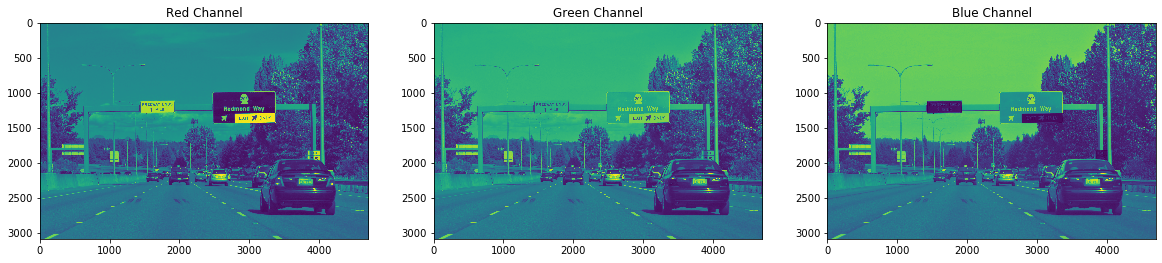

In [7]:
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))

ax1.imshow(red)
ax1.set_title('Red Channel')

ax2.imshow(green)
ax2.set_title('Green Channel')

ax3.imshow(blue)
ax3.set_title('Blue Channel')

## Color Threshold, Blue Screen

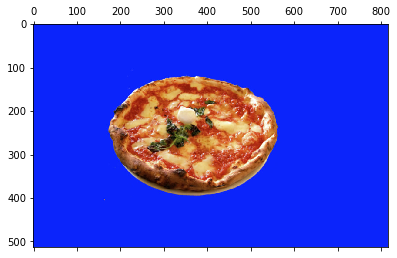

In [8]:
img = cv2.imread('images/pizza_bluescreen.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.matshow(img)

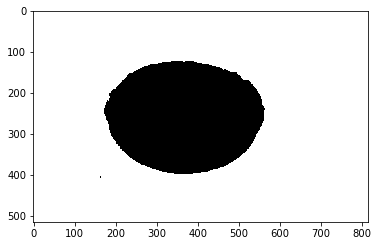

In [16]:
lower_blue = np.array([0,0,230])
upper_blue = np.array([100,100,255])

image_copy = np.copy(img)

mask = cv2.inRange(image_copy,lower_blue,upper_blue)

plt.imshow(mask,cmap='gray')

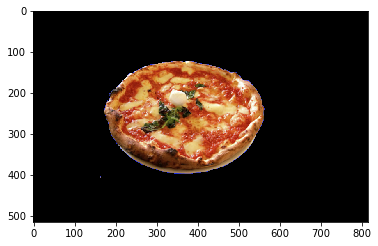

In [22]:
image_copy[mask != 0 ] =[0,0,0]

plt.imshow(image_copy)

Crop & add a background to the image masked image.

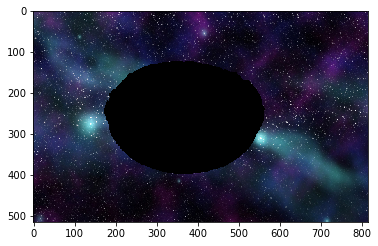

In [32]:
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

image_copy.shape #514*816*3

#resizing the background image
background_image = cv2.resize(background_image,(816,514))

#cropping out the required region
background_image = cv2.bitwise_and(background_image,background_image,mask=mask)

#alternative--> background_image[mask==0]=[0,0,0]

plt.imshow(background_image)

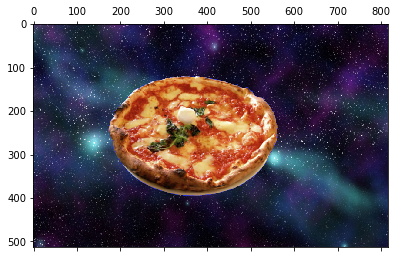

In [31]:
final_image = image_copy+background_image
plt.matshow(final_image)